In [144]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# plot 한글출력
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# warning message 제거
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_excel('../01.Data_Collection/films_edit.xlsx')

print(df.shape)
df.sample()

(810, 38)


,순위,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
431,63.0,김광석,20166132,2017-08-30,772483500,0.1%,772483500,98231,98231,223,6265,한국,한국,(주)씨네포트,(주)비엠컬쳐스,15세이상관람가,다큐멘터리,0,이상호,이상호,20191566.0,남자,감독,대통령의 7시간|다이빙벨 그후|김광석|다이빙벨: 진실은 침몰하지 않습니다|다이빙벨,이상호,이상호,이상호,20191566.0,남자,감독,대통령의 7시간|다이빙벨 그후|김광석|다이빙벨: 진실은 침몰하지 않습니다|다이빙벨,"김광석,이상호,신종민,안철호",김광석,NaN,20280629,남자,배우,김광석


# F-rated

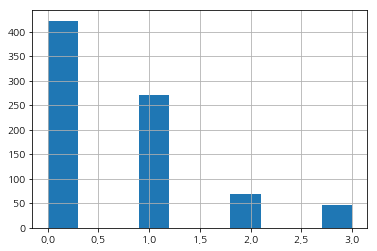

In [9]:
# F-rated 등급 별 영화 수, 비율(분석 전체 영화 대비) eg. 3등급은 n개고, 이건 n%. 2등급은 ….
df['F-rated'].hist()

In [62]:
data =df.groupby('F-rated')['영화코드'].size().reset_index()
F_rated_count = data.rename(columns={'영화코드': '영화 수'})
F_rated_count['전체 영화 중 비율(%)'] = round(F_rated_count['영화 수'] * 100/ sum(F_rated_count['영화 수']), 2)
F_rated_count

,F-rated,영화 수,전체 영화 중 비율(%)
0,0,423,52.22
1,1,271,33.46
2,2,70,8.64
3,3,46,5.68


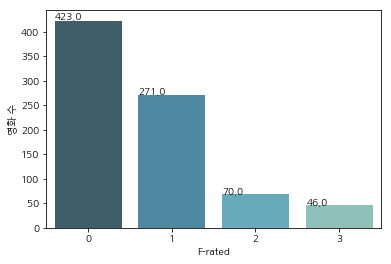

In [63]:
# F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated', y='영화 수', data=F_rated_count, palette='GnBu_d')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

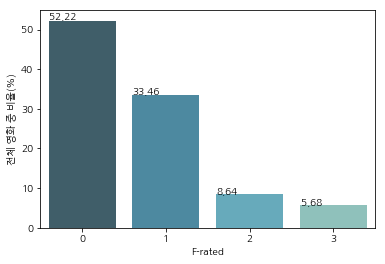

In [64]:
# F-rated 지수별 비율
ax = sns.barplot(x='F-rated', y='전체 영화 중 비율(%)', data=F_rated_count, palette='GnBu_d')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

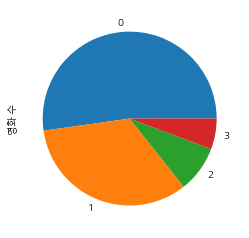

In [65]:
ax = F_rated_count['영화 수'].plot.pie()
# 컬러
# annotation

# 성비 - F-rated

### 대표감독 성별 - F-rated

In [66]:
# 대표감독 성별에 따른 F-rated 등급별 영화 수
data = df.groupby(['감독성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data.loc[data['감독성별'] == '여자', '감독성별 전체 영화 수'] = sum(data[data['감독성별'] == '여자']['영화 수'])
data.loc[data['감독성별'] == '남자', '감독성별 전체 영화 수'] = sum(data[data['감독성별'] == '남자']['영화 수'])
data['감독성별에 따른 F-rated 지수 비율(%)'] = round(data['영화 수'] * 100 /data['감독성별 전체 영화 수'], 2)
F_rated_by_director_sex = data
F_rated_by_director_sex

,감독성별,F-rated,영화 수,감독성별 전체 영화 수,감독성별에 따른 F-rated 지수 비율(%)
0,남자,0,420,700.0,60.00
1,남자,1,256,700.0,36.57
2,남자,2,24,700.0,3.43
3,여자,1,13,105.0,12.38
4,여자,2,46,105.0,43.81
5,여자,3,46,105.0,43.81


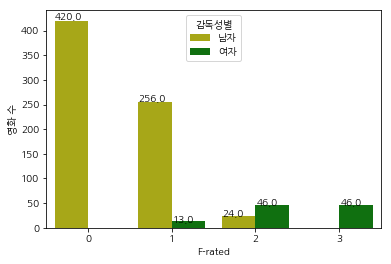

In [69]:
# 대표감독성별에 따른 F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated', y='영화 수',hue='감독성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

남성 감독의 경우 F-rated 지수가 높아질수록 영화 수가 현저히 줄어드는데 반해, 

여성 감독의 경우 F-rated 지수가 높은 영화의 비중이 훨씬 높다

    → 여성 감독들이 남성 감독에 비해 여성 배우, 여성 작가와 협업하는 비율이 높다
    → 감독이 여성인 경우, 약 90% 가 주연배우나 작가 중 여성을 1 명 이상 기용한다

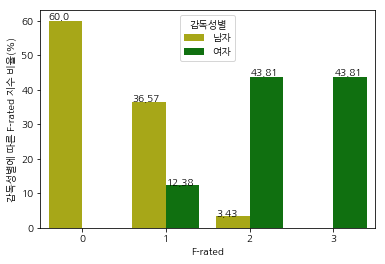

In [70]:
# 대표감독성별에 따른 F-rated 지수별 영화 비율
ax = sns.barplot(x='F-rated', y='감독성별에 따른 F-rated 지수 비율(%)',hue='감독성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

비율로 보면 감독성별에 따른 F-rated 차이가 훨씬 두드러진다

### 대표작가 성별 - F-rated

In [71]:
# 대표작가 성별에 따른 F-rated 등급별 영화 수
data = df.groupby(['작가성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data.loc[data['작가성별'] == '여자', '작가성별 전체 영화 수'] = sum(data[data['작가성별'] == '여자']['영화 수'])
data.loc[data['작가성별'] == '남자', '작가성별 전체 영화 수'] = sum(data[data['작가성별'] == '남자']['영화 수'])
data['작가성별에 따른 F-rated 지수 비율(%)'] = round(data['영화 수'] * 100 /data['작가성별 전체 영화 수'], 2)
F_rated_by_director_sex = data
F_rated_by_director_sex

,작가성별,F-rated,영화 수,작가성별 전체 영화 수,작가성별에 따른 F-rated 지수 비율(%)
0,남자,0,355,510.0,69.61
1,남자,1,153,510.0,30.00
2,남자,2,2,510.0,0.39
3,여자,1,58,164.0,35.37
4,여자,2,60,164.0,36.59
5,여자,3,46,164.0,28.05


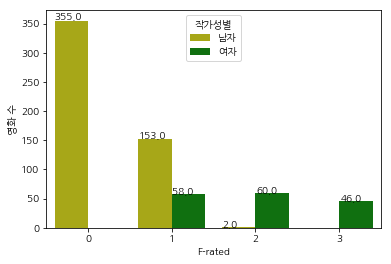

In [72]:
# 대표작가성별에 따른 F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated', y='영화 수',hue='작가성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

대표 작가가 남성인 경우 F-rated 2등급이 거의 없다

    대표 작가가 남성인 경우, 대표 감독이 남성인 경우보다 F-rated 가 낮은 것을 알 수 있다

대표 작가가 여성인 경우, F-rated 등급은 고르게 퍼져있는 편

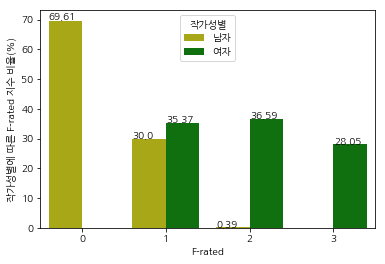

In [73]:
# 대표작가성별에 따른 F-rated 지수별 영화 비율
ax = sns.barplot(x='F-rated', y='작가성별에 따른 F-rated 지수 비율(%)',hue='작가성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

In [85]:
# 대표 감독이 곧 대표 작가인 경우
# print(df[df['감독코드'] == df['작가코드']].shape)
df[df['감독코드'] == df['작가코드']][['영화명', '대표감독']]
df[df['감독코드'] == df['작가코드']]['대표감독'].value_counts()

print('감독 == 작가: ')
print(df[df['감독코드'] == df['작가코드']]['감독성별'].value_counts())
print(' ')
print('감독 != 작가: ')
print(df[df['감독코드'] != df['작가코드']]['감독성별'].value_counts())
# df['감독성별'].value_counts()

감독 == 작가: 
남자    357
여자     64
Name: 감독성별, dtype: int64
 
감독 != 작가: 
남자    343
여자     41
Name: 감독성별, dtype: int64


대표감독이 곧 대표작가인 경우가 전체의 절반가량

감독성비 자체가 7:1로 기울어 있으므로 F-rated 가 쏠릴 수 밖에 없음

### 주연배우 성별 - F-rated

In [87]:
# 주연배우 성별에 따른 F-rated 등급별 영화 수
data = df.groupby(['배우성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data.loc[data['배우성별'] == '여자', '배우성별 전체 영화 수'] = sum(data[data['배우성별'] == '여자']['영화 수'])
data.loc[data['배우성별'] == '남자', '배우성별 전체 영화 수'] = sum(data[data['배우성별'] == '남자']['영화 수'])
data['배우성별에 따른 F-rated 지수 비율(%)'] = round(data['영화 수'] * 100 /data['배우성별 전체 영화 수'], 2)
F_rated_by_director_sex = data
F_rated_by_director_sex

,배우성별,F-rated,영화 수,배우성별 전체 영화 수,배우성별에 따른 F-rated 지수 비율(%)
0,남자,0,408,513.0,79.53
1,남자,1,70,513.0,13.65
2,남자,2,35,513.0,6.82
3,여자,1,199,279.0,71.33
4,여자,2,34,279.0,12.19
5,여자,3,46,279.0,16.49


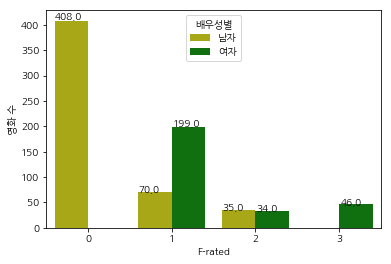

In [88]:
# 주연배우성별에 따른 F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated', y='영화 수',hue='배우성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

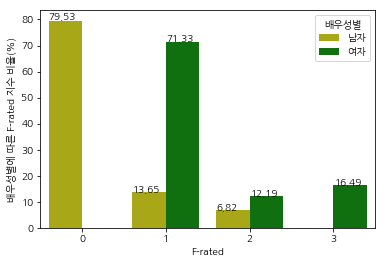

In [89]:
# 주연배우성별에 따른 F-rated 지수별 영화 비율
ax = sns.barplot(x='F-rated', y='배우성별에 따른 F-rated 지수 비율(%)',hue='배우성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

주연배우가 여성인 영화가 대표감독이나 대표작가가 여성인 영화에 비해 월등히 많다

    → 에로영화 때문인지 살펴보기

주연배우가 남성인 경우 대부분의 영화가 F-rated 지수 0 이다

    → 대표감독이나 대표작가가 남성인 영화에 비해 F-rated 지수 쏠림 현상이 더욱 심하다

### <!> 여성주연이 많은 이유- 에로영화 때문인지 살펴보기

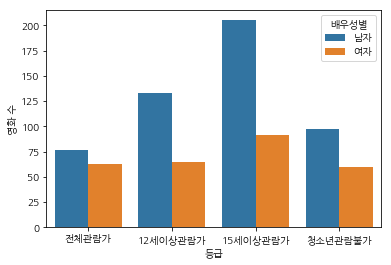

In [98]:
# 여성주연이 많은 이유- 에로영화 때문인지 살펴보기
data = df.groupby(['배우성별', '등급'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
sns.barplot(y='영화 수', hue='배우성별', x='등급', data=data, order=(['전체관람가', '12세이상관람가', '15세이상관람가', '청소년관람불가']))

청소년관람불가와 전체관람가에서 여성주연배우 비율이 높다
    
    → 등급별로 장르를 구분해서 살펴보기

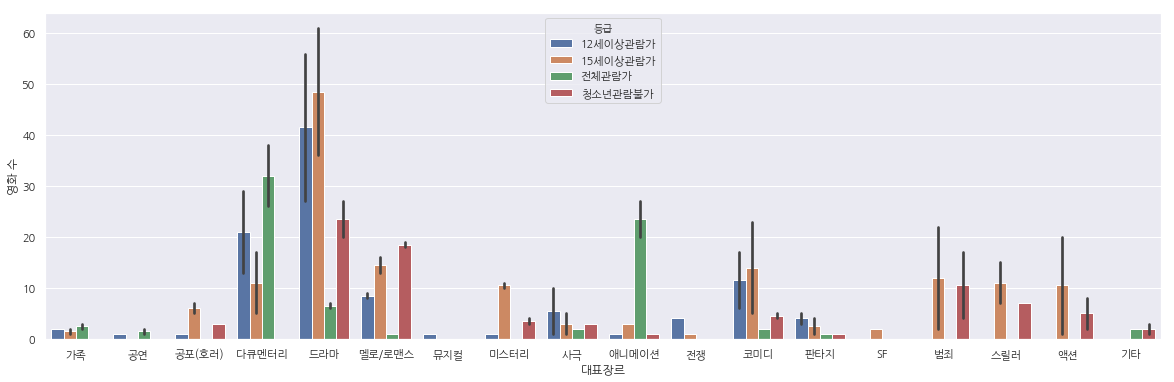

In [147]:
df['대표장르'] = df['장르'].apply(lambda x: str(x).split(',')[0])
df[df['등급'] == '전체관람가'][['영화명', '대표장르', '배우성별']]
df[df['등급'] == '전체관람가']['대표장르'].value_counts()
data = df.groupby(['등급', '대표장르', '배우성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data

plt.figure(figsize=[20, 6])
sns.barplot(x='대표장르', y='영화 수', hue='등급', data=data)

# plt.rcParams["figure.figsize"] = (10,5)
# data.plot(x='대표장르', y='영화 수', kind='bar', stacked=True)

등급 전체를 한번에 그래프로 그렸더니 잘 안보여서 등급별로 그래프를 따로 그려봄

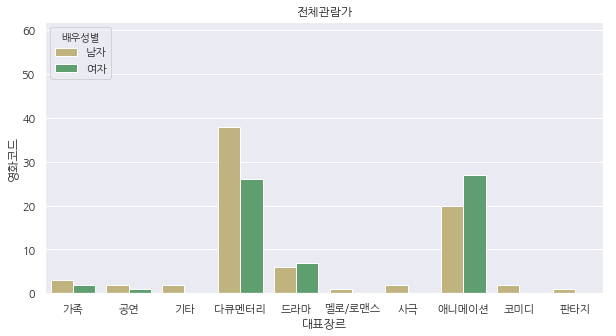

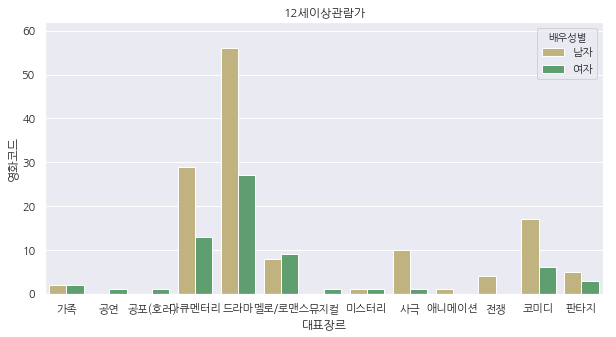

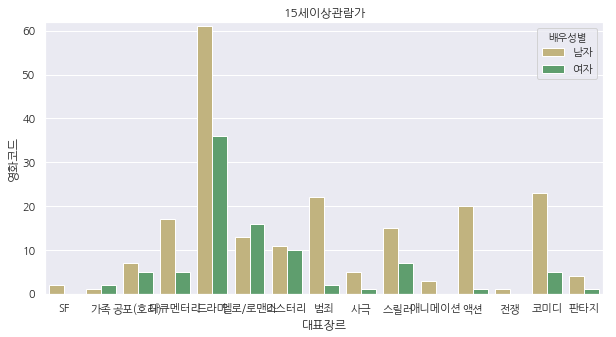

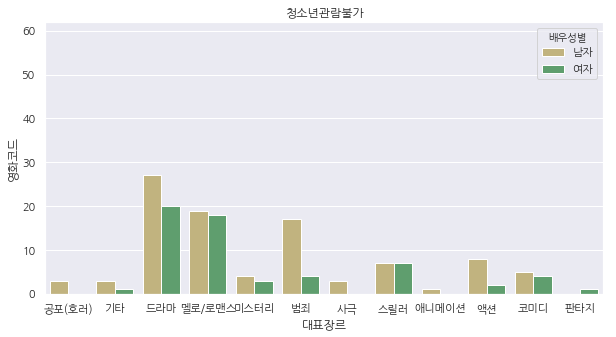

In [176]:
data = df.groupby(['대표장르', '등급', '배우성별'])['영화코드'].size().reset_index()

sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '전체관람가'], palette=['y', 'g'])
plt.ylim(0, 62)
plt.title('전체관람가')
plt.show()
sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '12세이상관람가'], palette=['y', 'g'])
plt.ylim(0, 62)
plt.title('12세이상관람가')
plt.show()
sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '15세이상관람가'], palette=['y', 'g'])
plt.ylim(0, 62)
plt.title('15세이상관람가')
plt.show()
sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '청소년관람불가'], palette=['y', 'g'])
plt.ylim(0, 62)
plt.title('청소년관람불가')
plt.show()

청소년관람불가 등급의 멜로/로맨스 장르에서 여성주연배우 비율이 특이하게 높음

    → 에로영화 
청소년관람불가 등급의 드라마 장르에도 에로영화 조금 섞여있음

In [175]:
df[(df['등급'] == '청소년관람불가') & (df['대표장르'] == '드라마')][['상영횟수', '영화명', '감독', '배우']]
df[(df['등급'] == '청소년관람불가') & (df['대표장르'] == '코미디')]['영화명']
df[(df['등급'] == '청소년관람불가') & (df['대표장르'] == '멜로/로맨스')]['영화명']

10                     비치하트애솔
11               어우동: 주인 없는 꽃
24                  몽골리안 프린세스
26                     태양을 쏴라
29                     맛있는 택배
36                    미궁: 비밀애
45                      연애의 맛
52                        무뢰한
58                         애인
99                      젊은 처제
111                      유부녀들
119                    맛있는 비행
127                       고시원
130                      친구엄마
132                   세상끝의 사랑
133    나도 때론 포르노그라피의 주인공이고 싶다
147                   극적인 하룻밤
148                  내 친구의 아내
165                     하숙집 2
170            금지된 섹스, 달콤한 복수
177                    뜨거운 이웃
182                    야한 누나들
186                개인교수: 심화학습
189                  야한밤 심야극장
190                      남과 여
193                    맛있는 만남
211                    동거의 목적
212                      입영전야
289                    나홀로 휴가
293                       돈 맛
309                   두 번째 스물
318                       연애담
330                    비치온더비치
350       

전체관람가는 다큐, 애니가 대부분

청소년관람불가는 두 분류로 나눌 수 있을 것
- 멜로/로맨스 -> 대부분 에로영화
- 드라마, 범죄, 스릴러, 액션, 미스터리, 공포

In [185]:
# data = df[df['등급'] == '청소년관람불가'].groupby(['배우성별', '대표장르', 'F-rated'])['영화코드'].size().reset_index()
# data = data.rename(columns={'영화코드': '영화 수'})
# sns.barplot(x='F-rated', y='영화 수', hue='배우성별', data=data[data['대표장르'] == '멜로/로맨스'])

# 연도별 - F-rated

In [195]:
df['datetime'] = pd.to_datetime(df['개봉일'])
df['year'] = pd.to_datetime(df['개봉일']).dt.year
df['month'] = pd.to_datetime(df['개봉일']).dt.month
df['day'] = pd.to_datetime(df['개봉일']).dt.day
df['weekday'] = pd.to_datetime(df['개봉일']).dt.dayofweek
df['weekday_name'] = pd.to_datetime(df['개봉일']).dt.weekday_name

# df = df.drop('dayofweek', axis=1)
# df = df.rename(columns={'weekday':'weekday_name'})
print(df.shape)
df.sample()

(810, 45)


,순위,영화명,영화코드,개봉일,매출액,매출액점유율,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모,대표장르,datetime,year,month,day,weekday_name,weekday
44,97.0,잡식가족의 딜레마,20148676,2015-05-07,44548800,0.0%,45567800,6405,6651,18,511,한국,한국,"스튜디오두마,(주)시네마달",(주)시네마달,전체관람가,다큐멘터리,3,황윤,황윤,10090225.0,여자,감독,잡식가족의 딜레마|어느날 그 길에서|침묵의 숲|작별|광장의 닭,황윤,황윤,황윤,10090225.0,여자,감독,잡식가족의 딜레마|어느날 그 길에서|침묵의 숲|작별|광장의 닭,황윤,황윤,황윤,10090225,여자,감독,NaN,다큐멘터리,2015-05-07,2015,5,7,Thursday,3


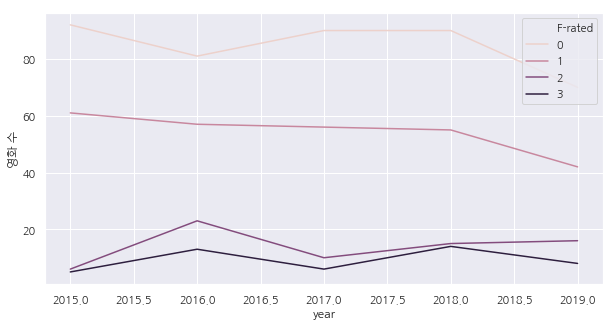

In [213]:
# 연도별 F-rated 등급 비율의 변화
data = df.groupby(['year', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'영화 수'})

sns.lineplot(hue='F-rated', y='영화 수', x='year', data=data)

(2019년 데이터는 9월까지만 반영되어 보정 필요)

F-rated 지수 2, 3 등급은 미미하지만 늘어나는 중

F-rated 0 등급은 거의 변화 없음

F-rated 1 등급은 오히려 줄어드는 중

    → 여성들이 참여하는 작품(1, 2, 3 등급) 내에서만 F-rated 지수가 높아지는 추세

    → 0 등급 (알탕영화)에는 영향이 없어 보임 (2016년에 잠깐 줄어들었다가 바로 복구됨)

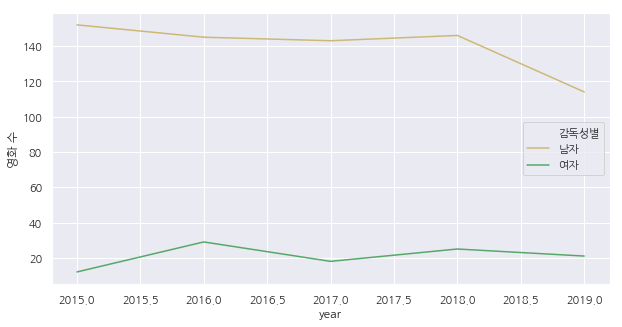

In [214]:
### 연도별 대표감독 성비 변화 추이
data = df.groupby(['year', '감독성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
sns.lineplot(x='year', y='영화 수', hue='감독성별', data=data, palette=['y', 'g'])

대표감독, 대표작가, 주연배우 중 성비가 가장 크게 차이나는 것은 대표감독 

    여성 1: 남성 7
    
여성 대표감독 수는 느리지만 꾸준히 늘고있는 것으로 보인다

    2016년에 2배가량 증가 이후 2017년 감소

(0, 120)

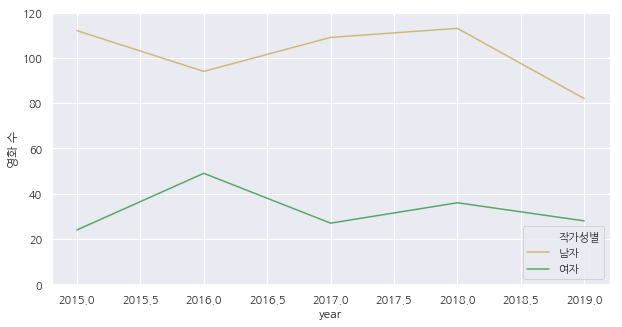

In [219]:
### 연도별 대표작가 성비 변화 추이
data = df.groupby(['year', '작가성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
sns.lineplot(x='year', y='영화 수', hue='작가성별', data=data, palette=['y', 'g'])
plt.ylim([0, 120])

2016년에 F-rated 변동이 컸던 것은 대표작가 때문인 것으로 확인

    → 여성 대표작가 수가 2016년에 가장 늘어남 2배 가량

이후 2017년 다시 2015년 수준으로 감소

(0, 112)

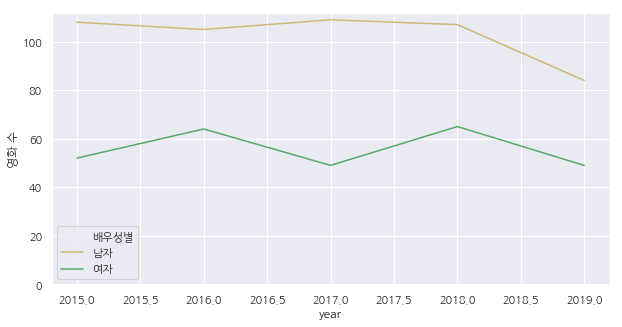

In [217]:
### 연도별 주연배우 성비 변화 추이
data = df.groupby(['year', '배우성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
sns.lineplot(x='year', y='영화 수', hue='배우성별', data=data, palette=['y', 'g'])
plt.ylim([0, 112])

대표감독, 대표작가, 주연배우 중에서 주연배우가 여성 비율이 가장 큼
    
    여성 1: 남성2
    
2016년에 여성주연 늘어났다가 2017년에 줄어듬

    2018년에 다시 2016년 수준으로 늘어남

남성주연 수에 큰 변화 없음
    
    아주 미미하게 줄어드는 것으로 보임

# 상영횟수등급 - F-rated

In [ ]:
# 상영횟수등급(가칭)에 따른 F-rated 등급 비율의 변화

In [ ]:
# 상영횟수등급 중위값에서 F-rated 등급이 높다 (상영횟수등급 낮을수록 에로영화 많고, 고예산 영화는 알탕)

# 추가하고 싶은 컬럼
- 감독 필모 갯수
- 작가 필모 갯수
- 배우 필모 갯수


- 감독 여러명인 경우 성비
- 작가 여러명인 경우 성비